In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
from scipy.spatial import distance
import random
import pickle
from scipy import stats

# allow us to re-use the framework from the src directory
import sys, os
sys.path.append(os.path.abspath(os.path.join('../')))

In [2]:
import max_ent.examples.grid_9_by_9 as G
from max_ent.utility.support import *

random.seed(123)
np.random.seed(123)


{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x11092d438>}


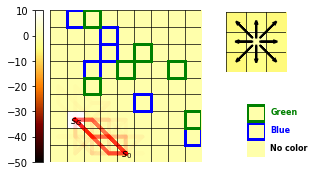

In [3]:

blue, green, cs, ca, start, goal = generate_constraints(9)
n, n_cfg, demo_n, f1 = create_world('Nominal', blue, green, start=start, goal=goal)

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x11092d438>}


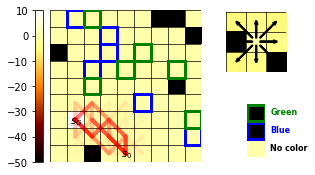

In [4]:
cc = [1, 2]
c, c_cfg, demo_c, f2 = create_world('Constrained', blue, green, cs, ca, cc, start=start, goal=goal, check=True)

MAE(best):  0.070708004344090
MAE(best):  0.011598353720660
MAE(best):  0.011440150175538
MAE(best):  0.011167827948726
Finished with MAE(best):  0.009983320110673
{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x11092d438>}


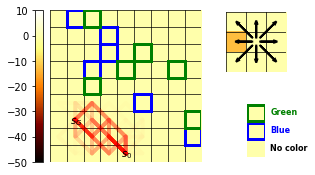

In [5]:
learned_params = G.learn_constraints(n.reward, c.world, c.terminal, demo_c.trajectories)
learned_mdp = G.MDP(c.world, learned_params.reward, c.terminal, c.start)
demo_l = G.generate_trajectories(c.world, learned_params.reward, c.start, c.terminal)

f1 = G.plot_world(f'Learned', learned_mdp, learned_params.state_weights, 
              learned_params.action_weights, learned_params.color_weights, 
              demo_l, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

In [6]:
from mc.self import *
#print(demo_c.trajectories)
modelSelf = ModelSelf(n, learned_mdp, demo_l)

In [7]:
from mc.system1 import *

s1 = System1Solver()


In [8]:
from mc.system2 import *

s2 = System2Solver()
s2.policy(modelSelf, 0)

2

In [14]:
from mc.mca import *
from max_ent.algorithms.gridworld_icrl import Demonstration

mca = MCA(s1,s2,modelSelf, n_tra_threshold=200)

demo_mca = mca.generate_trajectories(100)


#demo_mca = Demonstration(demo_mca, s1.policy)

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x11092d438>}


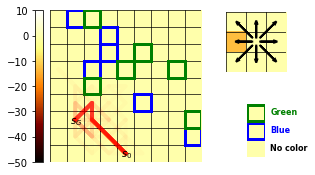

In [15]:
f1 = G.plot_world(f'MCA', learned_mdp, learned_params.state_weights, 
              learned_params.action_weights, learned_params.color_weights, 
              demo_mca, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)




In [16]:
mca.__dict__

{'s1': <mc.system1.System1Solver at 0x121405278>,
 's2': <mc.system2.System2Solver at 0x12143ceb8>,
 'modelSelf': <mc.self.ModelSelf at 0x1213ce9b0>,
 'n_tra_threshold': 200,
 'usage_s1': 258,
 'usage_s2': 177}